# COGS 118B - Final Project

# Skin Lesions and Clustering Models

## Group members

- Tom Hocquet
- Jesse Sanchez Villegas
- Kian Ekhlassi
- Jiawei Li

# Abstract 
<!-- This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables -->

Our goal is to be able to predict what type of skin lesion the patient has. The data we used consist of images that have Melanoma ,Melanocytic nevus,Basal cell carcinoma,Actinic keratosis,Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis), Dermatofibroma , Vascular lesion, Squamous cell carcinoma, or none of the above. We will be conducting photo segmentation to highlight and cluster similar features.Specifically our data consist of images which we will be converting into vectors, then use several clustering models like Kmeans to group the images with respect to each other to see if it can find a pattern within the vectors. From here we will have our model predict what lesion the patient has. Performance will be measured through its accuracy score, recall and F1 scores.

# Background

<!-- Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated.  -->

Skin lesions are a critical visible symptom of a potentially harmful disease but study shows that a significant amount of patients are unaware of carrying these diseases[1]. This leads to the conclusion that a vast majority of the population are uneducated despite the life altering consequences that can arise if not treated soon. This undiagnosed issue is explained by the increase in cost it takes to fully diagnose and treat skin lesions which discourages the general public in pursuing. Along with this, many diagnosed patients have spoken about their experiences and worry that they are oftentimes inspected by untrained physicians [2]. 
Overall it is apparent that the uneducated populace over a fairly common disease especially to elderly people, needs to have some changes. Our research is intended to create a model so that people can send pictures and ideally get an accurate prediction of what type of skin lesion they may have. Note this is not to replace the role of a trained professional, since the issue of misdiagnosing a possibly life threatening disease is not our goal. Instead our goal is to help the general public get a name of the possible disease they may have to be able to consult to the trained professional to get treatment in a timely manner. 

# Problem Statement

<!-- Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once). -->

The problem that we are solving is can we create a model to accurately predict what type of skin lesion a patient has (Melanoma, Melanocytic nevus, Basal cell carcinoma, Actinic keratosis, Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis), Dermatofibroma, Vascular lesion, or Squamous cell carcinoma) based on an image of the patient’s affected skin. We will be conducting image segmentation to classify skin lesions from image through some kind of clustering algorithm such as k-means, DBSCAN, Hierarchical clustering, and Gaussian Mixed Models. The problem is quantifiable because visual features such as color, shape and size of the skin lesion can be quantified. Specifically, pixel intensities and values that represent the color scale can be used to quantify image of skin lesion. Similarly, we can measure and evaluate the performance of our constructed classification model through metrics like accuracy, recall and F1 score. Moreover, this process of classification is vastly replicable because skin lesions are common symptoms among many patients and diagnosis of type of skin lesions occur frequently in clinical practices. By creating this classification model, we want to provide the general public with an easily accessible method of skin lesion diagnosis. 

# Data

<!-- Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!
 -->
 
Link to the dataset: https://www.kaggle.com/datasets/andrewmvd/isic-2019?resource=download
- Dataset Name: ISIC_2019_Training_Metadata
- \# of variables: 5; \# of observations: 25331
- Observation consists of: image (filename), age_approx(approximated age), anatom_site_general(anatomical site of image), lesion_Id (id of lesion), sex(sex of the patient)
- The most critical variable is the image, which is represented by its corresponding filename and stored in JPEG. The anatom_site_general is also a critical variable that stores the label of the anatomical site of the image. Some of the labels include anterior torso, lower extremity, higher extremity and palms/soles.
- For the images of the patients affected skin, we plan to encode these JPEG images and conduct pixel normalization in binary format during our preprocessing process.

# Proposed Solution

<!-- In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared.  -->

Our goal is to properly classify skin lesions from images. To solve this problem, we will use a mix of techniques. First we will do data preprocessing in order to make sure our data is in a form that we can use. Then we will use an unsupervised clustering algorithm to see if we can cluster different images easily. We will likely try k-means, DBSCAN, UMAP, t-SNE, Hierarchical clustering, Gaussian Mixed Models and Neural Networks. We might need to do dimensionality reduction (PCA, LDA, etc.) in order for these methods to work due to the curse of dimensionality. If we find that a specific clustering algorithm works particularly well, we will likely use it.
To test our solution we will use a cross-validation technique with a testing sample separated at the beginning on which we can test on at the very end. We will use the evaluation metrics below to measure our “success.” We will also use a benchmark model using KMeans (as it is the simplest model) for our solution to be compared against. 
Libraries that we will use will likely include but is not limited to:
Pandas, numpy, sklearn.cluster.(KMeans, DBSCAN …), sklearn.metrics, pytorch, tensorflow, matplotlib.

# Evaluation Metrics

Since we are dealing with a classification problem, doing a metric that measures our successes and failures accurately will be best. Maximizing the True Positive Rate will be our goal (recall, TP/P). We will also likely use the Positive Predictive Value (precision, TP/PP) and the F-score (2 TP /( 2 TP + FP + FN)) as it can balance if some of the size of classes is significantly different from the other. These three metrics will make sure to guide our solution to the right direction. Using these three metrics we should be able to evaluate our model accurately and we will also be able to use these tests for our validation and test set which will tell us if our model is generalizing well or not.
Apart from accuracy-based metrics, we will also use silhouette score to measure the cluster performance.

# Code

### Set Up

In [1]:
#importing the commands
import os
import cv2
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import warnings

# to get rid of warnings during models
warnings.filterwarnings("ignore", category=UserWarning, message=".*threadpoolctl.*")

Here we are defining functions that we will be using on the data in order to reduce the size of the orinigal images so that we can reduce computational power needed. Since we are reducing the size we want to make up for it my calculating the average of the images and recreating the images using the averages.

In [ ]:
# Function to load images from a directory
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        #images are in jpg format
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            images.append(image)
    return images

# Function to calculate average pixel values
def calculate_average_pixels(images):
    return np.mean(images, axis=(1, 2))

# Function to resize images using average pixel values
def resize_images(images, new_size=(30, 30)):
    resized_images = []
    for image in images:
        #built in the average pixel function within the resizing
        resized_image = np.full((new_size[0], new_size[1], 3), calculate_average_pixels([image]))
        resized_images.append(resized_image)
    return resized_images

In [ ]:
# Load images from dataset
dataset_directory = os.path.join('archive','ISIC_2019_Training_Input','ISIC_2019_Training_Input')
images = load_images(dataset_directory)

# Calculate average pixel values
average_pixels = calculate_average_pixels(images)

# Resize images using average pixel values
resized_images = resize_images(images)

The following code is to show us the comparison of the first 3 images between resized(avg) image to the original. Also will be a good indication for us to see if the avg pixel is a good basis to base the kmeans and make conclusions on or if its too drastically different to acknowledge that and consider it for our final conclusions.

In [ ]:
# Show the original and resized image
for i in range(3):
    cv2.imshow('Original', images[i])
    cv2.imshow('Resized', resized_images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
grayscale = pd.read_csv(os.path.join('grayscale_img.csv', 'grayscale_img.csv'), index_col = 0)

grayscale

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,label
0,38,93,145,137,135,151,163,173,184,179,...,177,171,165,152,143,99,35,19,24,NV
1,175,176,174,123,160,168,173,174,172,170,...,164,157,152,151,149,152,143,107,116,NV
2,8,40,76,88,93,93,100,109,113,118,...,147,145,143,140,135,117,49,6,2,MEL
3,176,175,176,174,172,175,175,178,180,180,...,186,187,185,182,182,180,182,179,179,NV
4,217,219,218,219,218,218,219,220,220,220,...,226,226,226,227,227,227,227,227,227,MEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,197,198,198,199,196,196,195,195,193,187,...,187,186,186,185,187,185,183,180,175,BCC
25327,208,213,214,213,213,211,210,205,209,208,...,205,206,208,206,205,207,201,201,200,BKL
25328,0,0,0,1,1,2,3,9,28,55,...,79,41,11,2,1,0,0,0,0,MEL
25329,1,1,2,9,37,76,106,129,143,154,...,180,169,162,147,125,90,39,5,2,NV


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_gray = grayscale.drop(columns = ['label'])
y_gray = grayscale['label']
clf = LinearDiscriminantAnalysis()
clf.fit_transform(X_gray, y_gray)

In [5]:
color = pd.read_csv(os.path.join('resized_images_color.csv', 'resized_images_color.csv'))

color

,0,1,2,3,4,5,6,7,8,9,...,2691,2692,2693,2694,2695,2696,2697,2698,2699,label
0,41,34,44,98,87,102,150,137,158,124,...,40,31,40,23,16,24,27,20,30,NV
1,161,153,223,165,153,224,163,151,223,108,...,116,123,194,82,85,159,91,94,169,NV
2,7,8,8,38,39,42,73,74,81,85,...,48,47,51,4,6,5,2,2,2,MEL
3,168,150,229,169,148,230,172,149,231,169,...,161,163,226,158,160,223,158,161,221,NV
4,224,216,215,228,219,215,227,219,215,226,...,229,227,225,229,228,224,229,228,224,MEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,199,171,247,202,172,247,202,172,247,203,...,174,160,231,172,156,229,166,153,223,BCC
25327,204,193,237,210,200,240,212,200,241,207,...,197,189,228,196,188,228,196,186,228,BKL
25328,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,MEL
25329,1,1,1,1,1,1,2,2,2,9,...,42,39,39,6,5,5,2,2,2,NV


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_color = color.drop(columns = ['label'])
y_color = color['label']
clf = LinearDiscriminantAnalysis()
clf.fit_transform(X_color, y_color)

We will now be using the data to conduct kmeans. Note the data set we will be testing on is a grayscaled, reduced sized (originally 512x512 into 30x30), and grayscaled for computational reasons. We want to point this out as it will affect results, given we are reducing and getting rid of possible features that may be important for better predictions. We used the average of pixels before reducing the size of the images to make up for the reduction 

In [6]:
# read the csv that has all the changes applied already
df = grayscale

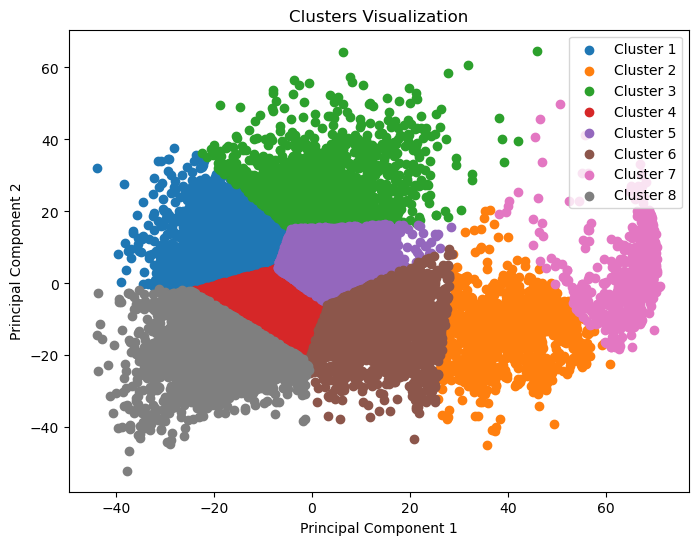

In [7]:
def vis_clust(df, n_clusters=8):
    # Convert DataFrame to numpy array
    data = df.values
    
    # Flatten the data
    flattened_data = data.reshape(data.shape[0], -1)
    
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(flattened_data)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data_scaled)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_reduced)
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        plt.scatter(data_reduced[cluster_labels == cluster, 0], 
                    data_reduced[cluster_labels == cluster, 1], 
                    label=f'Cluster {cluster + 1}')
    plt.title('Clusters Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Filter numeric columns bc some vectors contain string
numeric_df = df.select_dtypes(include=np.number)

# Call vis_clust only num values, because cant run with strings
vis_clust(numeric_df)

### K-Means

Now that we have the images preprocessed, we know there should be 8 different clusters since the images contain 8 different skin conditions, but we want to see how it will cluster them using k means. Also since we are doing a unsupervised portion we will be using a elbow method to decide the number of clusers, and compare to the actual amount we know is true.

The kmeans at 8 clusters does a good job at clustering. Our only concern would be the top right section between cluster 4 and 5 but that is a given due to outliers.

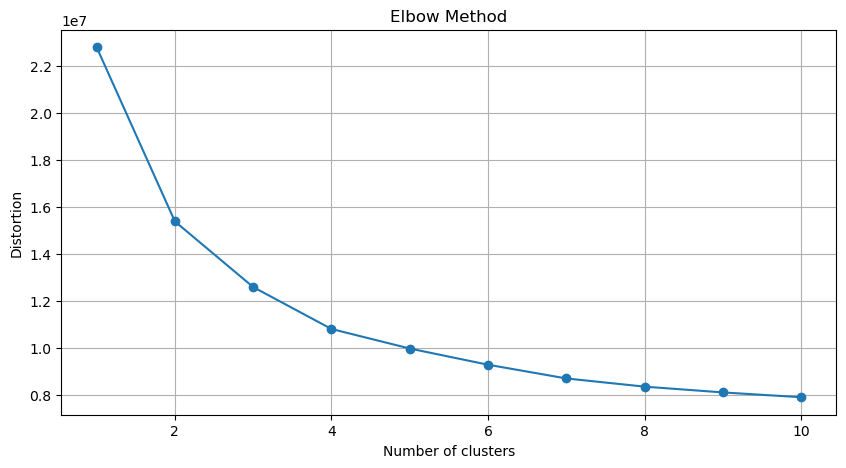

In [8]:
def elbow_method(df, max_clusters=10):
    distortions = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(df)
        # Sum of squared distances to closest centroid
        distortions.append(kmeans.inertia_)  

    # Plotting the elbow method
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.grid(True)
    plt.show()

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_columns]

# Prepare data
flattened_data = np.array([image.flatten() for image in numeric_data.values])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(flattened_data)

# Run elbow method
elbow_method(data_scaled, max_clusters=10)

We see that based off the elbow graph between 2-4 is ideal for the number of clusters for our kmeans. It makes sense that it would be less than 8 because that would be overfitting, but another reason for this can be that skin lesions may minor differences, that the kmeans overlooked. We will compare how a cluster of 3 looks with respect to cluster of 8.

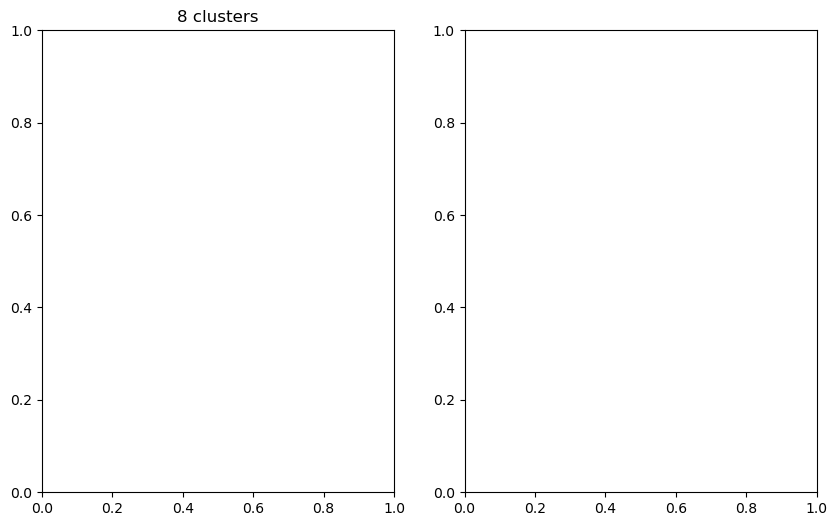

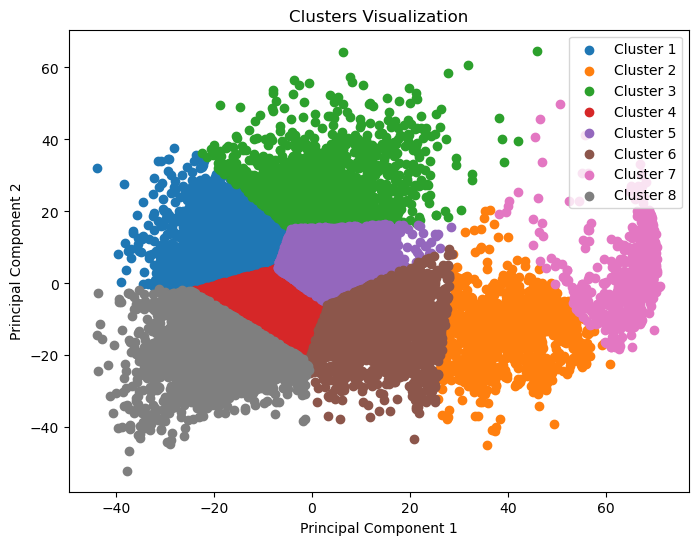

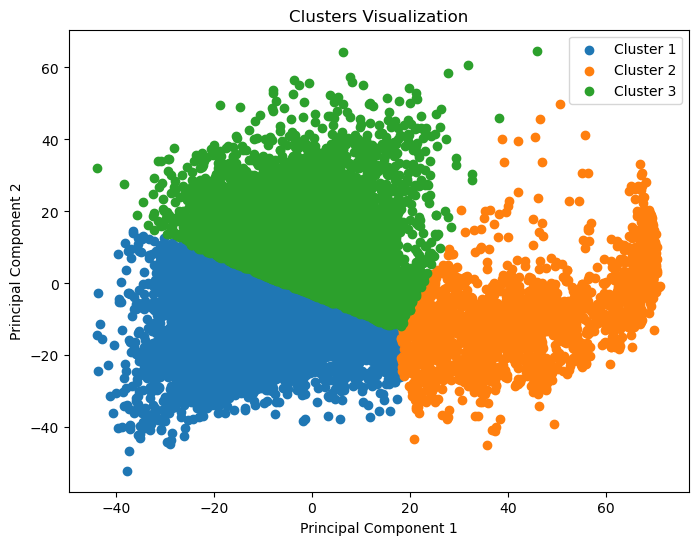

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot with 8 clusters
axs[0].set_title('8 clusters')
vis_clust(numeric_df, n_clusters=8)

# Plot with 3 clusters
axs[1].set_title('3 clusters')
vis_clust(numeric_df, n_clusters=3)

plt.tight_layout()
plt.show()

Our df's last column contains the truths of each image, we will now be using this column to see how accurate the kmeans is with respect to what we know is true. We will be testing this for clusters=3, and 9. 

In [10]:
# write out all the unique strings in the last column
unique_strings = df.iloc[:, -1].unique()
print(unique_strings)

['NV' 'MEL' 'BKL' 'DF' 'SCC' 'BCC' 'VASC' 'AK']


In [11]:
from sklearn.metrics import accuracy_score
#Extract truths from df last column
true_labels = df.iloc[:, -1]
# kmeans 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(data_scaled)
labels_3 = kmeans_3.labels_

#kmeans 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=42)
kmeans_8.fit(data_scaled)
labels_8 = kmeans_8.labels_

# Mapping clusters to true labels
cluster_mapping = {
    0: 'NV',
    1: 'MEL',
    2: 'BKL',
    3: 'DF',
    4: 'SCC',
    5: 'BCC',
    6: 'VASC',
    7: 'AK'
}

# Map cluster labels to true labels for 3 clusters
predicted_labels_3 = [cluster_mapping[label] for label in labels_3]

# Map cluster labels to true labels for 8 clusters
predicted_labels_8 = [cluster_mapping[label] for label in labels_8]

# Compare the accuracy of the clustering results
accuracy_3 = accuracy_score(true_labels, predicted_labels_3)
accuracy_8 = accuracy_score(true_labels, predicted_labels_8)
# Print the first few predicted labels for each clustering
print("\nPredicted Labels for 3 clusters:")
print(predicted_labels_3[:10])  # Print the first 10 predicted labels for 3 clusters
print("\nPredicted Labels for 8 clusters:")
print(predicted_labels_8[:10])  # Print the first 10 predicted labels for 8 clusters
print("Accuracy with 3 clusters:", accuracy_3)
print("Accuracy with 8 clusters:", accuracy_8)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Predicted Labels for 3 clusters:
['NV', 'BKL', 'BKL', 'NV', 'BKL', 'BKL', 'BKL', 'BKL', 'MEL', 'NV']

Predicted Labels for 8 clusters:
['AK', 'VASC', 'BCC', 'DF', 'DF', 'BKL', 'BCC', 'DF', 'NV', 'AK']
Accuracy with 3 clusters: 0.277051833721527
Accuracy with 8 clusters: 0.1038253523350835


Due to our low accuracy score in our image predicting models. We looked to the metadata of the images in an attempt to create a predictive model using those statistics of the patients and see if that is better at prediciting the skin lesion. 

Things to know from the following data it consists of 5 columns (image, age_approx, site, lesion id, sex). We needed to clean the data a bit specifically remove any rows without a lesion id. We then got rid of portion of the string in the lesion id, because the data included the lesion id with respect to the image. The reason for this is to be able to use this column as our ground truths for validation. Lastly we convert the sex column from string to numerical values in our case female=0, and male=1.

In [13]:
# Load the metadata from the CSV file
metadata_df = pd.read_csv(os.path.join('archive', "ISIC_2019_Training_Metadata.csv"))

# Drop rows where 'lesion_id' is blank or missing
metadata_df.dropna(subset=['lesion_id'], inplace=True)

# Remove characters after the underscore in 'lesion_id' column
metadata_df['lesion_id'] = metadata_df['lesion_id'].apply(lambda x: x.split('_')[0])

# Convert strings in the 'sex' column to numerical values
metadata_df['sex'] = metadata_df['sex'].map({'female': 0, 'male': 1})

### Hierarchical Clustering

We will now be creating a hierarchical clustering dendogram 

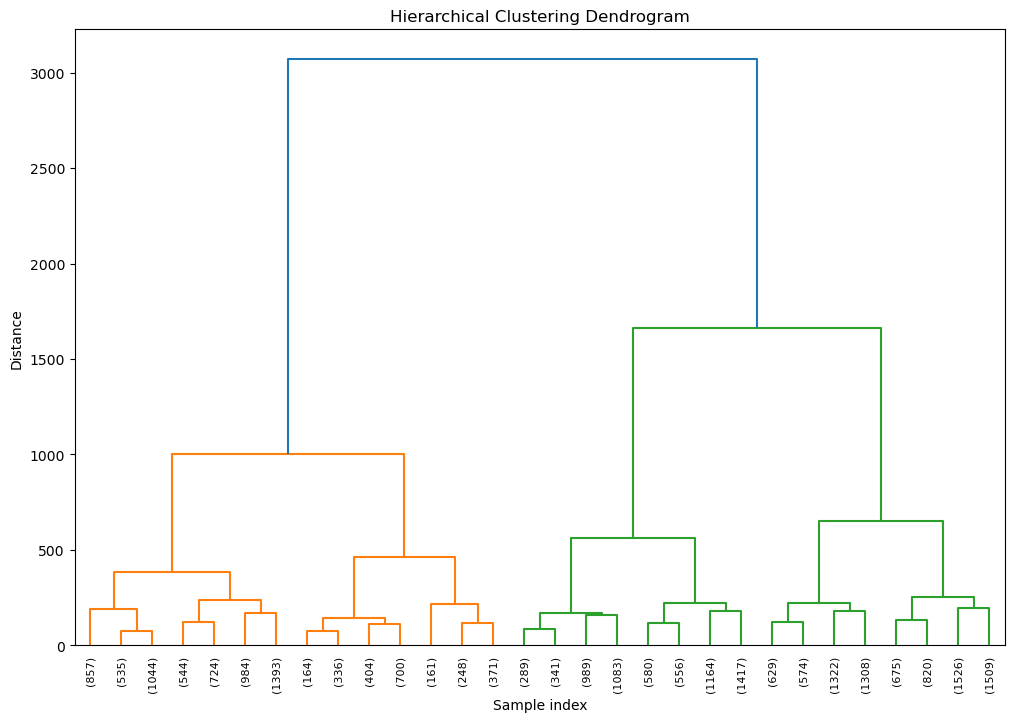

In [14]:
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoder = LabelEncoder()
metadata_df['anatom_site_general'] = label_encoder.fit_transform(metadata_df['anatom_site_general'])

# Select features for clustering
features = metadata_df[['age_approx', 'anatom_site_general','sex']]
# Impute NaN values with mean
features = features.fillna(features.mean())
# Perform hierarchical clustering
Z = linkage(features, method='ward')
# Plot dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=8.)
plt.show()

We adjusted the x axis, to show the range of sample index's otherwise it would not be legible given the number of samples we used.

In [15]:
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import fcluster

#Remove missing or blank values from metadata
metadata_df = metadata_df.dropna(subset=['lesion_id'])

#Ground Truth for validation
ground_truth_labels = metadata_df['lesion_id'].apply(lambda x: x.split('_')[0])

#Define a range of threshold distances
thresholds = range(10, 500, 5)

best_ari = -1
best_t = None

for t in thresholds:
    # Obtain cluster labels
    cluster_labels = fcluster(Z, t, criterion='distance')
    
    # Calculate ARI
    ari = adjusted_rand_score(ground_truth_labels, cluster_labels)
    
    # Update best ARI and threshold if ARI improves
    if ari > best_ari:
        best_ari = ari
        best_t = t

print("Best threshold distance (t):", best_t)
print("Best Adjusted Rand Index (ARI):", best_ari)

Best threshold distance (t): 220
Best Adjusted Rand Index (ARI): 0.02275504055198967


The for loop was used to find the best t value to get the highest ari. Unfortunately we still have a low score of  less than .1 which means our clustering did a very poor job at correctly prediciting with respect to the ground truths

The following we will be doing a second Hierarchical Clustering but this time we will imnplement weights to the features to see if this will improve ARI score.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have metadata features stored in 'X' and lesion types stored in 'y'

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_scaled, ground_truth_labels)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Normalize feature importances to create weights
weights = feature_importances / feature_importances.sum()

# Print feature importance weights
print("Feature Importance Weights:")
for feature, weight in zip(metadata_df.columns, weights):
    print(f"{feature}: {weight}")

Feature Importance Weights:
image: 0.13937592019013076
age_approx: 0.8500825471227146
anatom_site_general: 0.010541532687154595


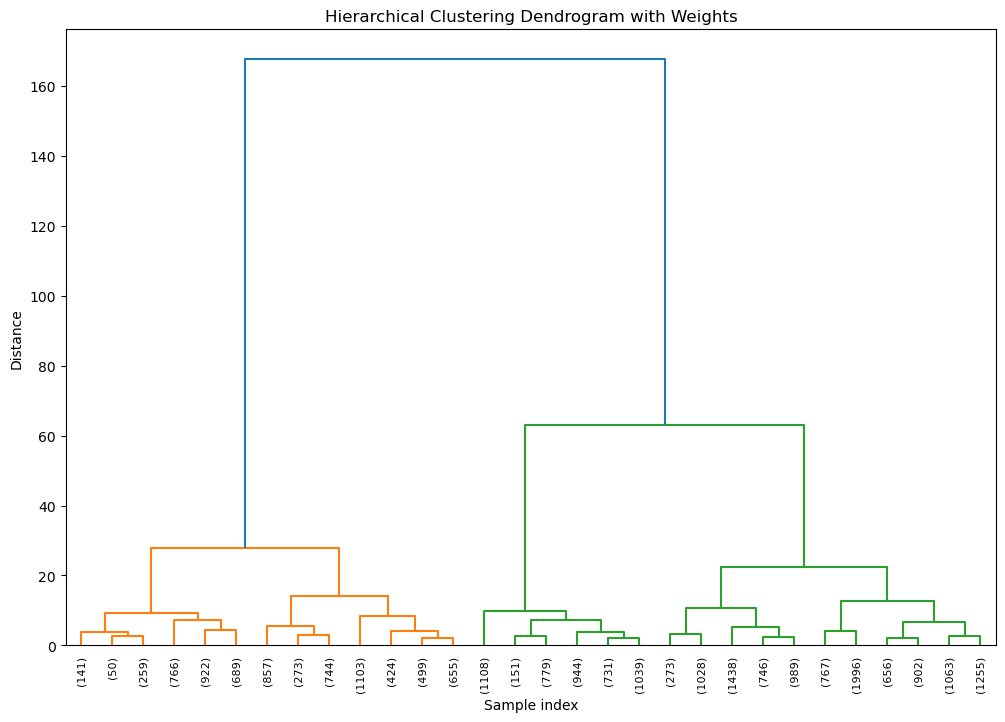

In [17]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Normalize metadata features using weights
weighted_features = X_scaled * weights

# Compute the weighted Euclidean distance matrix
weighted_distance_matrix = pdist(weighted_features)

# Perform hierarchical clustering with weighted distance matrix
Z = linkage(weighted_distance_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram with Weights')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [18]:
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import fcluster

# Remove missing or blank values from metadata
metadata_df = metadata_df.dropna(subset=['lesion_id'])

# Ground Truth for validation
ground_truth_labels = metadata_df['lesion_id'].apply(lambda x: x.split('_')[0])

# Define a range of threshold distances
thresholds = range(10, 500, 5)

best_ari = -1
best_t = None

for t in thresholds:
    # Obtain cluster labels with weighted hierarchical clustering
    cluster_labels = fcluster(Z, t, criterion='distance')
    
    # Calculate ARI
    ari = adjusted_rand_score(ground_truth_labels, cluster_labels)
    
    # Update best ARI and threshold if ARI improves
    if ari > best_ari:
        best_ari = ari
        best_t = t

print("Best threshold distance (t):", best_t)
print("Best Adjusted Rand Index (ARI):", best_ari)

Best threshold distance (t): 30
Best Adjusted Rand Index (ARI): 0.15862574514502684


We see that our ARI has increased significantly when we incorporated weights before it was roughly 0.02 and now the ARI is roughly 0.16. Meaning our model improved in predicting the ground truth, but it is still low when considering the ARI score where ARI=1 perfect prediction. With this said since it is >0 meaning it performs better than random prediction.

### Gaussian Mixture Model

In [24]:
def vis_clust_gmm(data, n_clusters=9):
#     flattened_data = np.array([image.flatten() for image in data])
#     scaler = StandardScaler()
#     data_scaled = scaler.fit_transform(flattened_data)


    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data)

    #Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(data_reduced)
    cluster_labels = gmm.predict(data_reduced)


    plt.figure(figsize=(8, 6))
    for cluster in np.unique(cluster_labels):
        plt.scatter(data_reduced[cluster_labels == cluster, 0], 
                    data_reduced[cluster_labels == cluster, 1], 
                    label=f'Cluster {cluster + 1}')
    plt.title('GMM Clusters Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()
vis_clust_gmm(color, n_clusters=9) 

# from sklearn.metrics import silhouette_score

# def evaluate_gmm_silhouette(data, n_clusters=9):
#     # Calculate silhouette score
#     silhouette_avg = silhouette_score(data_reduced, cluster_labels)
#     print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')


#     plt.figure(figsize=(8, 6))
#     for cluster in np.unique(cluster_labels):
#         plt.scatter(data_reduced[cluster_labels == cluster, 0], 
#                     data_reduced[cluster_labels == cluster, 1], 
#                     label=f'Cluster {cluster 

### Neural Networks

In [25]:
data = pd.read_csv("archive/ISIC_2019_Training_GroundTruth.csv", header = 0)
lesion_type_dict = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis ',
    'BCC': 'Basal cell carcinoma',
    'AK': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma',
    'SCC' : 'Squamous cell carcinoma'
}
data['truth'] = data.drop(columns='image').idxmax(axis=1)
data.head(20)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,truth
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV


In [26]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [30]:
def load_data(path: str):
    dir = Path(path)
    filepaths = list(dir.glob(r'**/*.jpg'))
    labels = data['truth']
    filepaths = pd.Series(filepaths, name='FilePaths').astype(str)
    labels = pd.Series(labels, name='Labels').astype(str)
    df = pd.merge(filepaths, labels, right_index=True, left_index=True)
    return df.sample(frac=1).reset_index(drop=True)
df = load_data('archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input')

In [31]:
df.head(20)

,FilePaths,Labels
0,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,NV
1,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,BCC
2,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,MEL
3,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,NV
4,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,NV
5,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,NV
6,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,BCC
7,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,BKL
8,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,BKL
9,archive\ISIC_2019_Training_Input\ISIC_2019_Tra...,NV


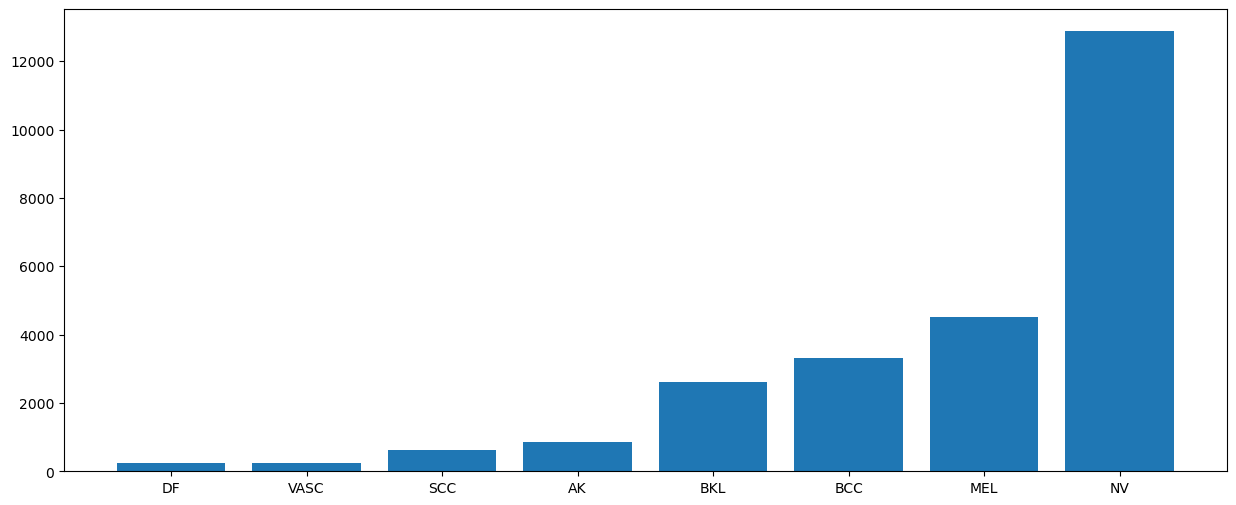

In [32]:
labels_count = df['Labels'].value_counts(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(labels_count.index, labels_count.values)
plt.show()

In [33]:
df['Labels'] = df['Labels'].apply(lambda x: x if x == 'NV' else 'OTH')
df_binary = df['Labels']
binary = np.array([-1 if x == 'OTH' else 1 for x in df_binary])
binary.shape

(25331,)

We can see that our data is heavily biased towards NV, and has low numbers of other diseases

In [34]:
files = pd.read_csv('archive/ISIC_2019_Training_GroundTruth.csv')
files

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
filesWithLabels = pd.DataFrame()
filesWithLabels['file'] = files['image']+'.jpg'
filesWithLabels['label'] = ""

In [36]:
filesWithLabels['label'] = data['truth']
filesWithLabels['file'] = 'archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input/'+filesWithLabels['file']

In [37]:
X_train, X_test = train_test_split(filesWithLabels, test_size=0.2, random_state=42)

In [38]:
X_train

,file,label
24937,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,AK
12362,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,NV
4223,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,NV
1355,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,NV
16166,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,BCC
...,...,...
21575,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,NV
5390,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,NV
860,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,MEL
15795,archive/ISIC_2019_Training_Input/ISIC_2019_Tra...,NV


In [39]:
epochs = 5
input_shape = (128, 128, 3)
num_classes = 1
def get_model():   

    model = Sequential([
        Input(shape=(128, 128, 3)),
        Conv2D(16, kernel_size=(3, 3), input_shape=input_shape, activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.2),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.2),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.2),
        Conv2D(128, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.2),
        Conv2D(256, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.2),
        Flatten(),
        Dense(1, activation="sigmoid")
    ])
    return model

In [40]:
datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True, 
    vertical_flip=True,
    fill_mode="nearest",
)
def plot_history(history, title):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.title(title)
    plt.show()

In [41]:
def conver_models(model,name):
    dest_folder = '/kaggle/working/'
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()
    with open(dest_folder  + name +".tflite", 'wb') as f:
        f.write(tflite_model)
def create_model(table, name, epoch):
    early_stop = EarlyStopping(monitor='val_loss', patience=5)
    train_generator = datagen.flow_from_dataframe(
        dataframe=table,
        directory=None,
        x_col='file',
        y_col='label',
        subset="training",
        batch_size=64,
        seed=42,
        shuffle=True,
        class_mode="binary",
        target_size=(128, 128))
    val_generator = datagen.flow_from_dataframe(
        dataframe=table,
        directory=None,
        x_col='file',
        y_col='label',
        subset="validation",
        batch_size=64,
        seed=42,
        shuffle=True,
        class_mode="binary",
        target_size=(128, 128))
    # Create a function that yields samples
    model = get_model()
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    history = model.fit(train_generator, epochs=epoch, validation_data=val_generator, callbacks=[early_stop])
    return history, model     

In [42]:
NVTable = pd.concat([X_train.loc[X_train['label'] != 'NV'].sample(n=8000), X_train.loc[X_train['label'] == 'NV']])
NVTable['label'] = NVTable['label'].apply(lambda x: 'OTH' if x != 'NV' else x)

n = X_train.loc[X_train['label'] == 'MEL'].shape[0]
MELTable = pd.concat([X_train.loc[X_train['label'] != 'MEL'].sample(n=n), X_train.loc[X_train['label'] == 'MEL']])
MELTable['label'] = MELTable['label'].apply(lambda x: 'OTH' if x != 'MEL' else x)

n = X_train.loc[X_train['label'] == 'BKL'].shape[0]
BKLTable = pd.concat([X_train.loc[X_train['label'] != 'BKL'].sample(n=n), X_train.loc[X_train['label'] == 'BKL']])
BKLTable['label'] = BKLTable['label'].apply(lambda x: 'OTH' if x != 'BKL' else x)

n = X_train.loc[X_train['label'] == 'DF'].shape[0]
DFTable = pd.concat([X_train.loc[X_train['label'] != 'DF'].sample(n=n), X_train.loc[X_train['label'] == 'DF']])
DFTable['label'] = DFTable['label'].apply(lambda x: 'OTH' if x != 'DF' else x)

n = X_train.loc[X_train['label'] == 'SCC'].shape[0]
SCCTable = pd.concat([X_train.loc[X_train['label'] != 'SCC'].sample(n=n), X_train.loc[X_train['label'] == 'SCC']])
SCCTable['label'] = SCCTable['label'].apply(lambda x: 'OTH' if x != 'SCC' else x)

n = X_train.loc[X_train['label'] == 'BCC'].shape[0]
BCCTable = pd.concat([X_train.loc[X_train['label'] != 'BCC'].sample(n=n), X_train.loc[X_train['label'] == 'BCC']])
BCCTable['label'] = BCCTable['label'].apply(lambda x: 'OTH' if x != 'BCC' else x)

n = X_train.loc[X_train['label'] == 'VASC'].shape[0]
VASCTable = pd.concat([X_train.loc[filesWithLabels['label'] != 'VASC'].sample(n=n), X_train.loc[X_train['label'] == 'VASC']])
VASCTable['label'] = VASCTable['label'].apply(lambda x: 'OTH' if x != 'VASC' else x)

n = X_train.loc[X_train['label'] == 'AK'].shape[0]
AKTable = pd.concat([X_train.loc[X_train['label'] != 'AK'].sample(n=n), X_train.loc[X_train['label'] == 'AK']])
AKTable['label'] = AKTable['label'].apply(lambda x: 'OTH' if x != 'AK' else x)

tables = {
    "AK": AKTable,
    "NV": NVTable,
    "MEL": MELTable,
    "BKL": BKLTable,
    "DF": DFTable,
    "SCC": SCCTable,
    "BCC": BCCTable,
    "VASC": VASCTable,

}

In [43]:
NVTable_test = pd.concat([X_test.loc[X_test['label'] != 'NV'].sample(n=1000), X_test.loc[X_test['label'] == 'NV']])
NVTable_test['label'] = NVTable_test['label'].apply(lambda x: 'OTH' if x != 'NV' else x)

n = X_test.loc[X_test['label'] == 'MEL'].shape[0]
MELTable_test = pd.concat([X_test.loc[X_test['label'] != 'MEL'].sample(n=n), X_test.loc[X_test['label'] == 'MEL']])
MELTable_test['label'] = MELTable_test['label'].apply(lambda x: 'OTH' if x != 'MEL' else x)

n = X_test.loc[X_test['label'] == 'BKL'].shape[0]
BKLTable_test = pd.concat([X_test.loc[X_test['label'] != 'BKL'].sample(n=n), X_test.loc[X_test['label'] == 'BKL']])
BKLTable_test['label'] = BKLTable_test['label'].apply(lambda x: 'OTH' if x != 'BKL' else x)

n = X_test.loc[X_test['label'] == 'DF'].shape[0]
DFTable_test = pd.concat([X_test.loc[X_test['label'] != 'DF'].sample(n=n), X_test.loc[X_test['label'] == 'DF']])
DFTable_test['label'] = DFTable_test['label'].apply(lambda x: 'OTH' if x != 'DF' else x)

n = X_test.loc[X_test['label'] == 'SCC'].shape[0]
SCCTable_test = pd.concat([X_test.loc[X_test['label'] != 'SCC'].sample(n=n), X_test.loc[X_test['label'] == 'SCC']])
SCCTable_test['label'] = SCCTable_test['label'].apply(lambda x: 'OTH' if x != 'SCC' else x)

n = X_test.loc[X_test['label'] == 'BCC'].shape[0]
BCCTable_test = pd.concat([X_test.loc[X_test['label'] != 'BCC'].sample(n=n), X_test.loc[X_test['label'] == 'BCC']])
BCCTable_test['label'] = BCCTable_test['label'].apply(lambda x: 'OTH' if x != 'BCC' else x)

n = X_test.loc[X_test['label'] == 'VASC'].shape[0]
VASCTable_test = pd.concat([X_test.loc[X_test['label'] != 'VASC'].sample(n=n), X_test.loc[X_test['label'] == 'VASC']])
VASCTable_test['label'] = VASCTable_test['label'].apply(lambda x: 'OTH' if x != 'VASC' else x)

n = X_test.loc[X_test['label'] == 'AK'].shape[0]
AKTable_test = pd.concat([X_test.loc[X_test['label'] != 'AK'].sample(n=n), X_test.loc[X_test['label'] == 'AK']])
AKTable_test['label'] = AKTable_test['label'].apply(lambda x: 'OTH' if x != 'AK' else x)

tables = {
    "AK": AKTable_test,
    "NV": NVTable_test,
    "MEL": MELTable_test,
    "BKL": BKLTable_test,
    "DF": DFTable_test,
    "SCC": SCCTable_test,
    "BCC": BCCTable_test,
    "VASC": VASCTable_test,

}

In [ ]:
for i in tables.keys():
    hist_1, mdl_1 = create_model(tables[i], str(i) + " model, validation", 7)
    test_generator = datagen.flow_from_dataframe(
        dataframe=tables_test[i], 
        directory=None, 
        x_col='file', 
        y_col='label',
        batch_size=64,
        seed=42,
        shuffle=False, 
        class_mode="binary",
        target_size=(128, 128)
        )
    eval_result = mdl_1.evaluate(test_generator)
    print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")
    plot_history(hist_1, str(i) + " model, validation loss")

Found 284 validated image filenames belonging to 2 classes.
Found 70 validated image filenames belonging to 2 classes.
Epoch 1/7
5/5 [==============================] - 37s 7s/step - loss: 1.4022 - accuracy: 0.6127 - val_loss: 1.6045e-09 - val_accuracy: 1.0000
Epoch 2/7
5/5 [==============================] - 21s 5s/step - loss: 0.8684 - accuracy: 0.6479 - val_loss: 3.2317e-04 - val_accuracy: 1.0000
Epoch 3/7
5/5 [==============================] - 20s 4s/step - loss: 0.5876 - accuracy: 0.7218 - val_loss: 1.8982e-04 - val_accuracy: 1.0000
Epoch 4/7
5/5 [==============================] - 21s 4s/step - loss: 0.6855 - accuracy: 0.7113 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 5/7
5/5 [==============================] - 21s 4s/step - loss: 0.5524 - accuracy: 0.7254 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 6/7


# Results / Discussion

### K-Means
For our K-Means models, we experimented with different numbers of clusters, specifically n_cluster = 8 and n_cluster = 3. We initially started with 8 clusters because it corresponds to the number of classes in the original dataset. From the plot the clustering algorithm outputted, we can see it successfully identified and produced 8 different clusters. We then tried to stimulate the unsupervised process by using the elbow method to determine how many clusters will be ideal for the K-Means clustering algorithm. The elbow method determined 3 is the optimal k value so we ran the K-Means algorithm with n_cluster = 3 in comparison to our initial number of clusters. Eventually we compared our clustering results with the ground truth values from the dataset to examine accuracy for our model. The accuracy scores obtained were 0.30500177647941257 and 0.17437132367454897 for 3 and 8 clusters respectively. As reflected by the low accuracy score, we conclude K-Means was not the ideal clustering algorithm for our dataset.


### Hierarchical Clustering
Initially we created a hierarchical clustering dendrogram without implementing weights. After comparing it against the ground truth data, the best Adjusted Rand Index (ARI) we were able to obtain was 0.02275504055198967, which is very low. Therefore, we proceeded to implement weights to the features in the hierarchical clustering and obtained an ARI score of 0.15862574514502684. We see that our ARI has increased significantly when we incorporated weights before it was roughly 0.02 and now the ARI is roughly 0.16. Meaning our model improved in predicting the ground truth, but it is still low when considering the ARI score where ARI=1 perfect prediction. With this said since it is >0 meaning it performs better than random prediction.




### PCA and LDA
Our first intuition was to run PCA on our data and see which principle vectors were best and try to split our data that way. After trying different principle vectors, we realized that PCA was measuring a lot of the noise in our data. This was especially true on the 30x30x1 data, where most of the features were noise as the details that we were measuring were squished. 
We then ran LDA to try to find another way to split the data into clusters. We believe that LDA could be successful in splitting the data as in theory it would be better than PCA, but in practicality with version of the data it was not successful for the same reasons that PCA and a lot of the following algorithms were not successful. We eventually decided to not include LDA in our report because it did not produce useful results. 
Finding a way to do dimensional reduction was essential for the clustering algorithm to work, which we were not successful in doing so. This means that the following sections are limited in usability because of this and the issues discussed in limitations.
### UMAP and t-SNE
To try to see if reducing the data could lead to some local structure on which we could run a clustering algorithm, we ran both t-SNE and UMAP. We ran t-SNE for 5 different perplexities and UMAP for 20 different neighbors and minimum distance. Unfortunately neither t-SNE or UMAP led to a separation of our data in a way that was meaningful. This is likely due to the fact that most of the data is noice (the skin) and the difference that we are trying to measure is just a small feature of the images. Hence our metrics on these algorithms are not great as the data was not able to be separated. 
### DB-Scan
With DB-Scan we ran into a lot of the same issues as with UMAP and t-SNE. We couldn’t separate our data well into different clusters, so running DB-Scan did not lead to great results. 


### Gaussian Mixture Model
Our investigation in classifying skin lesions based on imaging data led us to the Gaussian Mixture Model clustering approach. The aim was to explore the underlying patterns in the data. The data was preprocessed, standardized, and dimensionally reduced using PCA which simplified the data for visualization. We applied GMM with nine clusters corresponding with the nine skin lesion types. After fitting the model to the dimensionally reduced data, each image was assigned to a cluster, with the aim of grouping similar lesion types together. The clustering results were visualized in the reduced two dimensional space. The visualization revealed more defined clusters, however this contrasted with the distribution of true labels which appeared more scattered and less cohesive. This shows that the patterns within the data do not align well with predefined lesion types. SO the Gaussian Mixture model is not the best clustering algorithm for this project. 


### Neural Network Results
For the classification Neural Network, we first tried to do a multi class classifier. Creating multiple neural networks to try different convolution and options of learnable parameters, the accuracy we would get would be around 52%, which is not bad for 8 possible classes but still not great. To try to improve the model. We decided to train multiple binary classifiers. To do so we added some image transformations for the model to generalize better and created random datasets which encompass an equal number of positive and negative classes. After running 3 epochs, our models had the following accuracies:
AK: 0.75
NV: 0.80 
MEL: 0.74
BKL: 0.54
DF: 0.68
SCC:0.73
BCC: 0.80
VASC: 0.74
The following scores show a great improvement from the previous multi-class model. Some of the limitations we had were computing power as due to the nature of the large dataset and the loading of the images, we could only load a smaller image size. At first we worked with 30x30x3 images (30 pixels by 30, 3 channels for red, blue and green). The second model we managed to upscale the images to 128x128x3, but even then the quality is low for human eyes and differentiating and being able to point out details that make specific lesions is very hard. If we had a better computing machine, we would have run it on 512x512x3 as that is a size that is a lot easier to see the difference between lesions. Having more computing power would also let us run more epochs which could lead to a higher chance of finding a better way to classify the classes. Overall there are still a lot of things that can be done to improve this neural network, but given the time it takes to run each model (around 8 hours) and the time limitations of this project, this is the best that we have come up with in the given time frame. 


### Limitations

There are a lot of possible improvements to be made to this model. The first is having a stronger computer that can handle the high dimensionality of our data and the big size of the dataset. We had issues with uploading the data on datahub or collab, which meant that most of the code was run locally. Even then, we all dealt with dead kernels and our laptops crashing running this code. This made making progress extremely tough. When running code did work, we had computation limitations. We were only able to use 30x30x1 data for most of our project which meant the feature that we were looking for tended to be lost. For the neural network we managed to load the way in a more efficient way in the neural network which was able to work on 128x128x3 data. This led to more promising results, and we believe that if we were able to work with 512x512x3 data that we would be able to have a lot higher accuracy. This is also true of our clustering algorithm, with more details we would be able to find the vector on which the clusters are best split by, (which again the details are lost in 30x30x1 data).    

### Ethics & Privacy

In terms of ethical concerns the main issue is where the images are sourced from, and whether or not the people in the photos have given their consent for researchers to study them. In our case photos do not contain any faces, they are high resolution photos of the skin disease site only. It seems some sort of microscope was used to take these pictures. The data was obtained from a hospital in Barcelona, where the patient's consent was given. We sourced the dataset from Kaggle which is a reliable source for ethical data. Another ethical concern is what this data will be used for. In our case the model we create will only benefit humanity, because people can detect skin melanoma or other cancerous diseases in early stages and seek medical care as soon as possible.

 We want to emphasize, that our models should not be a main source of diagnosing patients or people that have concerns with regarding to their skin lesions. Since our model did not perform great as we have anticipated it is not a reliable diagnosing tool. Had it performed better we would still advise the general public to seek professional and experienced medical doctors to diagnose their skin lesions.

### Conclusion

Our clustering methods did not work since we were unable to separate the data and therefore did not perform well when it comes to clustering skin lesions. On the other hand, The  Neural Network performed relatively well with some skin lesions having a 80 % accuracy. Relating to the article in which the general public could not trust some medical experts to correctly diagnose them, our methods and models  can use some improvements before they can be exposed to the public. For future work we would encourage it first to rerun the models using the original dataset images. We then encourage them to adjust the images to zoom into the skin lesion and remove the hair if possible to reduce noise for the models.

# Footnotes
1.^: Hafner K. and Palmer G. (20 Nov 2017) Skin Cancers Rise, Along With Questionable Treatments. The New York Times https://www.nytimes.com/2017/11/20/health/dermatology-skin-cancer.html

2.^: Skuhala, Tomislava, et al. “Analysis of Types of Skin Lesions and Diseases in Everyday Infectious Disease Practice- How Experienced Are We?” Life, vol. 12, no. 7, 29 June 2022, p. 978, Https://doi.org/10.3390/life12070978 .  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9319552/


